<a href="https://colab.research.google.com/github/TheMikeste1/cse380-notebooks/blob/master/ponder_and_prove_conditional_probability_and_Bayes_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ponder and Prove Conditional Probability and Bayes' Theorem**
Due: Saturday, 13 February 2021, 11:59pm

# ~DONE~ Watch a Video on Bayes' Theorem

[and making probability intuitive](https://www.youtube.com/watch?v=HZGCoVF3YvM), 15.75 minutes long.

# ~DONE~ Apply Bayes’ Theorem


Automating the process of finding bugs in source code requires the use of heuristics, or pattern-matching on the code. There is no deep understanding of the code involved, hence such a tool cannot be perfect at detecting bugs. A certain bug-detection tool is correct 80% of the time and incorrect the rest of the time. This means that on average out of every 100 bugs, the tool will detect 80 of them, and fail to detect 20 of them. Also, out of 100 non-bugs, the tool will report 20 bugs and 80 non-bugs, on average. The tool is run on source code that is 10% buggy. That is, one line out of every ten contains a bug. Given that the tool detects a bug in some line of code, what is the probability that this line of code actually contains a bug?

# ~DONE~ Compute Four Leaves


Using the information in the previous task, calculate to two-decimal-digit precision, the values that go at the leaves of the binary tree shown below:

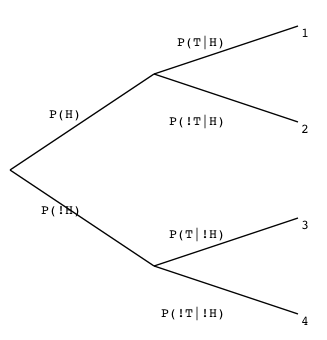

The value that goes at leaf number 1 is calculated by $P(H) \cdot P(T|H)$. The other three values are calculated similarly.

Hint: The four leaves correspond to the four quadrants of trutH versus tesT described in this brief introduction to [Bayes' Theorem](https://byui-cse.github.io/cse380-course/Bayes-Theorem.pdf). (Compare this to the video you watched.)

### Put your answers here:
1. $P(H) \cdot P(T|H)$ = (0.1)(0.8) = 0.08 
2. $P(H) \cdot P(\lnot T|H)$ = (0.1)(0.2) = 0.02
3. $P(\lnot H) \cdot P(T|\lnot H)$ = (0.9)(0.2) = 0.18
4. $P(\lnot H) \cdot P(\lnot T|\lnot H)$ = (0.9)(0.8) = 0.72


# ~DONE~ Apply Your Probability Knowledge



There are three sheets of paper in a folder. One sheet has writing on both sides, one has writing on one side and is blank on the other side, and the third sheet of paper is blank on both sides. Without looking you randomly pull one sheet of paper out of the folder and see that it is blank on the side you're looking at. What is the probability that the other side is blank as well?

# ~DONE~ Apply Bayes Theorem Generalized

Three different vegetables, turnips, eggplant and asparagus, make Bill sick sometimes. There is a 50% chance he will be sick if he eats turnips. If he eats eggplant, there is a 20% chance he will be sick. The probability that he will be sick when he eats asparagus is only 5%.

Bill gets sick after dinner where he ate one of those three vegetables. What is the probability that he ate turnips?

(Assume that for each of the three vegetables, there is a 1/3 chance he ate it.)

# ~DONE~ Apply Bayes Theorem Generalized With Different **Priors**

Change the prior probabilities of Bill eating these vegetables to a 30% chance he ate turnips, a 10% chance he ate eggplant, and a 60% chance he ate asparagus.

Now what is the probability that Bill ate turnips, given that he got sick?


# ~DONE~ My Report on What I Did and What I Learned

## Fun

I enjoyed looking into these problems and comparing them against my instinct. Sometimes my gut feeling was close, other times I was quite off. I also enjoyed writing a small simulation to verify I did the buggy code question correctly.

## New

I feel I have learned more about how Bayes' Theorem works and how to apply it. Of particular use was the final problem, where each event had a different chance of occurring.

## Meaningful

I was already familiar with Bayes' Theorem due to having taken a machine learning course, but it was nice to revisit and reinforce my knowledge on the topic.

## Response

Bayes' Theorem:
$$
P(H|T) = \frac{P(H)P(T|H)}{P(T)} = 
\frac{P(H)P(T|H)}{P(H)P(T|H) + P(\lnot H)P(T|\lnot H)}
$$

### Libraries

In [ ]:
from random import random

### 3Blue1Brown

3Blue1Brown is one of my favorite channels. The producer's teaching style works very well for me. I thought his perspective on using area instead of ratios to visualize Bayes' Theorem was particularly useful.

I asked some of the questions he explained in the video to my wife and unsurprisingly found the results to be the same as those in the video. It is interesting how people don't want to be just "correct," but rather "most correct."

### Apply Bayes’ Theorem

Here, $H$ is the line being buggy, and $P(T)$ is if the program flags the line.

The probability a line is buggy is 10%, so $P(H) = 0.1$.\
The probability a line is not buggy is 90%, so $P(\lnot H) = 0.9$.\
The probability a line is flagged given it is buggy is 80%, so $P(T|H) = 0.8$.\
The probability a line is flagged given it is not buggy is 20%, so $P(T|\lnot H) = 0.2$.

**Therefore:**\
The probability a line is buggy and is flagged is $P(H \cap T) = P(H) \cdot P(T|H) = 0.1 \cdot 0.8 = 0.08$.\
The probability a line is not buggy and is flagged is $P(\lnot H \cap T) = P(\lnot H) \cdot P(T|\lnot H) = 0.9 \cdot 0.2 = 0.18$

The total probability of a line being flagged is $P(T) = P(H)P(T|H) + P(\lnot H)P(T|\lnot H) = 0.08 + 0.18 = 0.26$

Now that we have all the parts, we can apply them to determine the probability of a line legitimately being flagged:
$$
P(H|T) = \frac{P(H)P(T|H)}{P(T)} = \frac{0.08}{0.26} = \frac{4}{13} \approx 0.31
$$

This is surprisingly low. However, whereas bugs can be notoriously difficult to detect, this could still be a great help.

#### Verification Simulation

In [ ]:
def gen_lines(num_lines:int, portion_buggy:float):
  """
  True means buggy, False means clean.

  :param num_lines: The number of lines to generate.
  :param portion_buggy: The proportion to be buggy.
    Should be less than or equal to 1.
  :return: A list of booleans representing whether or
    not a line is buggy. 
    True means buggy, False means clean.
  """
  num_buggy = int(num_lines * portion_buggy)
  lines = [True] * num_buggy
  return lines + [False] * (num_lines - num_buggy)

In [ ]:
def simulate_flagging(lines:[bool], p_tp:float, p_tn:float):
  """
  :param lines: List of bools where true is a buggy line
    and false is a clean line.
  :param p_tp: Proportion True Positive; how often a buggy
    line is correctly flagged.
  :param p_tn: Proportion True Negative; how often a clean
    line is correctly ignored.
  :return: A list of flags stating whether or not a line
    was flagged.
    True means flagged, false means not flagged.
  """
  flagged = []
  for l in lines:
    if l:  # The line has a bug
      flagged.append(random() <= p_tp)
    else:  # The line is clean
      flagged.append(random() > p_tn)
  return flagged

In [ ]:
def run_instance(num_lines, p_buggy, p_tp, p_tn):
  lines = gen_lines(num_lines, p_buggy)
  flags = simulate_flagging(lines, p_tp, p_tn)

  num_true_positive = 0
  num_true_negative = 0
  num_false_positive = 0
  num_false_negative = 0
  for buggy, flagged in zip(lines, flags):
    if buggy: 
      if flagged:
        num_true_positive += 1
      else:
        num_false_negative += 1
    else:
      if flagged:
        num_false_positive += 1
      else:
        num_true_negative += 1
  return (num_true_positive, num_true_negative, 
          num_false_positive, num_false_negative)

In [ ]:
num_lines = 100
p_buggy = 0.1
p_true_positive = 0.8
p_true_negative = 0.8

num_true_positive, \
num_true_negative, \
num_false_positive, \
num_false_negative = \
  run_instance(num_lines,
               p_buggy,
               p_true_positive,
               p_true_negative)

print("True+: ", num_true_positive)
print("False+:", num_false_positive)

total_positive = num_true_positive + num_false_positive
print("% True+:", num_true_positive / total_positive * 100)


True+:  8
False+: 17
% True+: 32.0


This seems about right. Let's run it a few times.

In [ ]:
n = 10000
num_lines = 100
p_buggy = 0.1
p_true_positive = 0.8
p_true_negative = 0.8

total_percent = 0
for _ in range(n):
  num_true_positive, \
  num_true_negative, \
  num_false_positive, \
  num_false_negative = \
    run_instance(num_lines,
                 p_buggy,
                 p_true_positive,
                 p_true_negative)
  total_positive = num_true_positive + num_false_positive
  total_percent += num_true_positive / total_positive
print("Average % True+:", total_percent / n * 100)

Average % True+: 31.198198511425208


### Apply Your Probability Knowledge

The probability of choosing the double-blank sheet is $P(DB) = \frac13 \approx 0.33$.\
The probability of pulling a side that is blank is $P(S) = \frac36 = 0.5$.\
The probability of pulling a blank side given it is the double-blank sheet is $P(S|DB) = 1$. \
The probability of pulling a blank side given it is the not double-blank sheet is $P(S|\lnot DB) = 0 \cdot \frac13 + \frac12 \cdot \frac13 = \frac16$.

$P(DB)P(S|DB) = \frac13 \cdot 1 = \frac13 \approx 0.33$ \
$P(\lnot DB)P(S|\lnot DB) = \frac23 \cdot \frac14 = \frac{2}{12} = \frac16 \approx 0.167$

$$
P(DB|S) = \frac{\frac13}{\frac13 + \frac{1}{6} = \frac{1}{2}} =
\frac{2}{3} \approx 0.667
$$

There is a 0.667 probability (66.7% chance) we have chosen the double-blank sheet and so the other side will also be blank.

### Apply Bayes Theorem Generalized

$P(\text{Turnip } [T]) = \frac13$ \
$P(S|T) = \frac12$ \
$P(\text{Eggplant } [E]) = \frac13$ \
$P(S|E) = \frac15$ \
$P(\text{Asparagus } [A]) = \frac13$ \
$P(S|A) = \frac{1}{20}$


$P(T)P(S|T) = \frac16$ \
$P(E)P(S|E) = \frac{1}{15}$ \
$P(A)P(S|A) = \frac{1}{60}$

$P(S) = P(T)P(S|T) + P(E)P(S|E) + P(A)P(S|A) = \frac16 + \frac{1}{15} + \frac{1}{60} = \frac14$

$$
P(T|S) = \frac{P(T)P(S|T)}{P(S)} =
\frac{\frac16}{\frac14} =
\frac46 = \frac23 \approx 0.667
$$

The probability he is sick because he ate turnips is 0.667, or 66.7%.

### Apply Bayes Theorem Generalized With Different Priors

$P(\text{Turnip } [T]) = \frac{3}{10}$ \
$P(S|T) = \frac12$ \
$P(\text{Eggplant } [E]) = \frac{1}{10}$ \
$P(S|E) = \frac15$ \
$P(\text{Asparagus } [A]) = \frac{3}{5}$ \
$P(S|A) = \frac{1}{20}$


$P(T)P(S|T) = \frac{3}{20}$ \
$P(E)P(S|E) = \frac{1}{50}$ \
$P(A)P(S|A) = \frac{3}{100}$

$P(S) = P(T)P(S|T) + P(E)P(S|E) + P(A)P(S|A) = \frac{3}{20} + \frac{1}{50} + \frac{3}{100} = \frac15$

$$
P(T|S) = \frac{P(T)P(S|T)}{P(S)} =
\frac{\frac{3}{20}}{\frac15} = 
\frac{3 \cdot 5 = 15}{20} = \frac34 = 0.75
$$

The probability he is sick because he ate turnips is 0.75, or 75%.

## Other
**Collaborators:**\
Michael Hegerhorst - Author

# ~DONE~ What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [ ]:
#@markdown ## What is true about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ### I watched the linked-to 3Blue1Brown video on Bayes' Theorem, and reported on the experience.
cb03 = True #@param {type:'boolean'}
#@markdown ## What is true about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb04 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb05 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb07 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb08 = True #@param {type:'boolean'}
#@markdown ## What is true about my answers?
#@markdown ### I got the right answer for the "Apply Bayes' Theorem" problem, and my report describes how I know it.
cb09 = True #@param {type:'boolean'}
#@markdown ### I got the right answer for the "Compute Four Leaves" problem, and my report describes how I know it.
cb10 = True #@param {type:'boolean'}
#@markdown ### I got the right answer for the "Apply Your Probability Knowledge" problem, and my report describes how I know it.
cb11 = True #@param {type:'boolean'}
#@markdown ### I got the right answer for the "Apply Bayes' Theorem Generalized" problem, and my report describes how I know it.
cb12 = True #@param {type:'boolean'}
#@markdown ### I got the right answer for the "Apply Bayes' Theorem Generalized With Different Priors" problem, and my report describes how I know it.
cb13 = True #@param {type:'boolean'}


# For graders

In [ ]:
#@markdown ---
number_of_MIs_found = 0 #@param {type: 'slider', min: 0, max: 5}
#@markdown ---


## TA Comments

VERY well done!